**Box Plot**

- Box Plot is used to identify the outliers

- Outlier is an observation having huge positive vale or huge neative value

- Q1 = 25p, Q2 = 50p, Q3 = 75p

- IQR = Inter Quartile Range = **Q3 - Q1**

- **Q3 + 1.5 X IQR** and **Q1 - 1.5 X IQR**

**Importing**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading**

In [2]:
visa_df=pd.read_csv(r"C:\Users\Asus\DS\Data_Files\Visadataset.csv")
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


**Columns**

In [3]:
cat_columns=visa_df.select_dtypes(include='object').columns
num_columns=visa_df.select_dtypes(exclude='object').columns
num_columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**BOXPLOT with plt**

{'whiskers': [<matplotlib.lines.Line2D at 0x21797e6d8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x21797e6f350>,
 'boxes': [<matplotlib.lines.Line2D at 0x21797e6cc90>],
 'medians': [<matplotlib.lines.Line2D at 0x21797e78bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21797e79790>],
 'means': []}

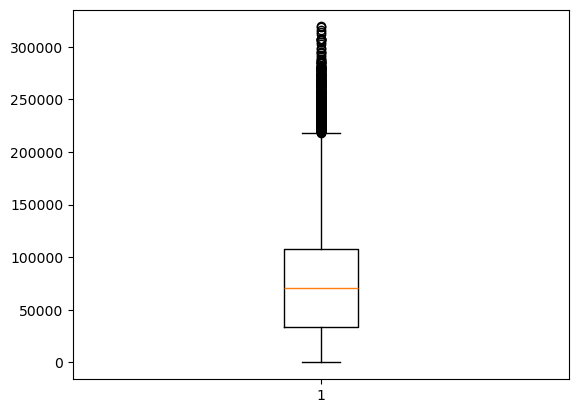

In [4]:
wage_plot = visa_df['prevailing_wage']
plt.boxplot(wage_plot)

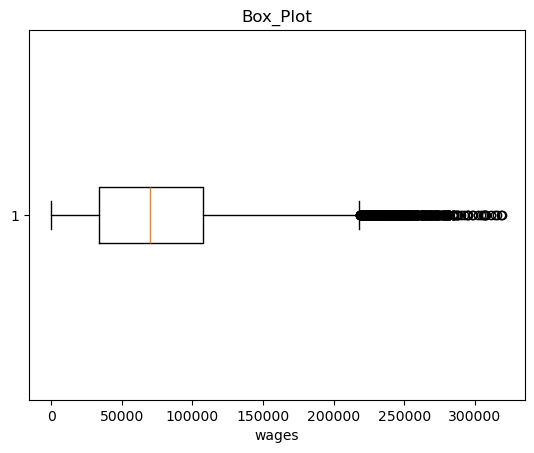

In [5]:
wage_plot = visa_df['prevailing_wage']
plt.boxplot(wage_plot, vert=False)
plt.title('Box_Plot')
plt.xlabel('wages')
plt.show()

**BOXPLOT with seaborn**

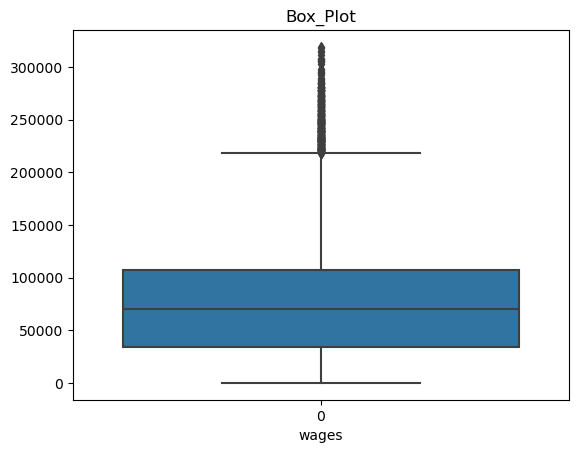

In [5]:
wage_plot = visa_df['prevailing_wage']
sns.boxplot(wage_plot)
plt.title('Box_Plot')
plt.xlabel('wages')
plt.show()

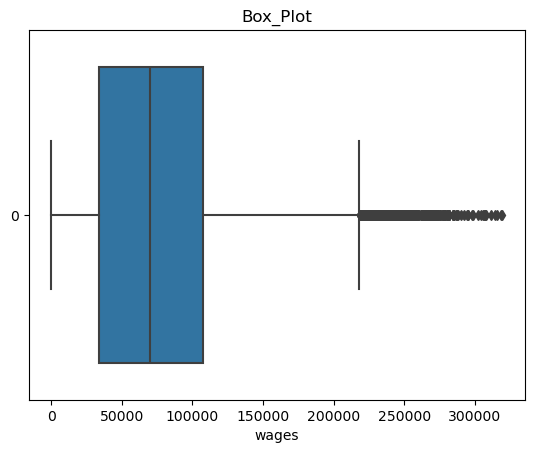

In [7]:
wage_plot = visa_df['prevailing_wage']
sns.boxplot(wage_plot, orient='h')
plt.title('Box_Plot')
plt.xlabel('wages')
plt.show()

**Plot - The Histogram plot and Box plot Side-by-Side**

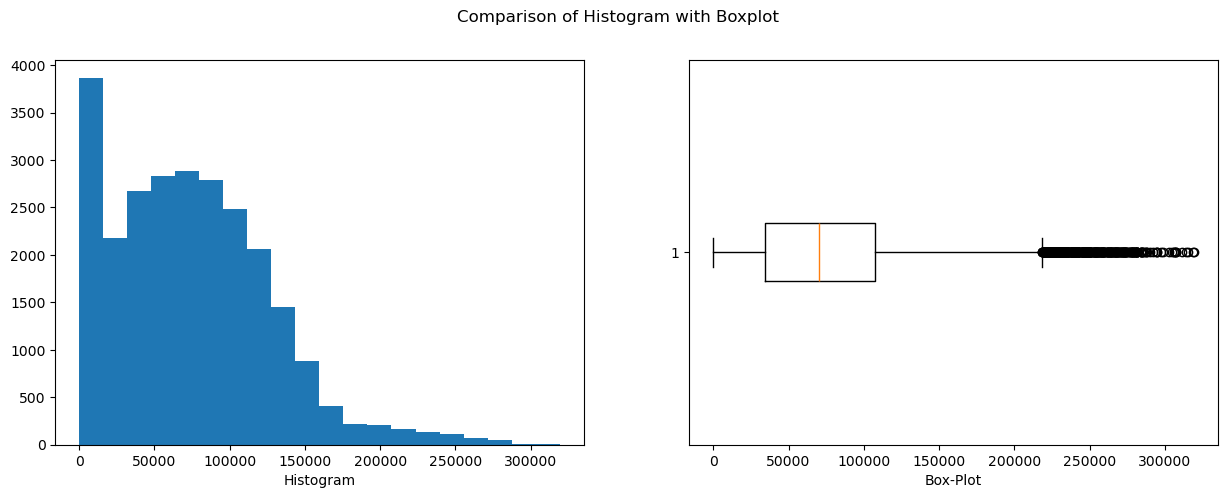

In [8]:
wage_plot=visa_df['prevailing_wage']

plt.figure(figsize=(15,5))

plt.suptitle('Comparison of Histogram with Boxplot')

plt.subplot(1,2,1)
plt.hist(wage_plot,bins=20)
plt.xlabel('Histogram')

plt.subplot(1,2,2)
plt.boxplot(wage_plot,vert=False)
plt.xlabel('Box-Plot')

plt.show()

**plt.subplot().hist()**

**plt.subplot().boxplot()**

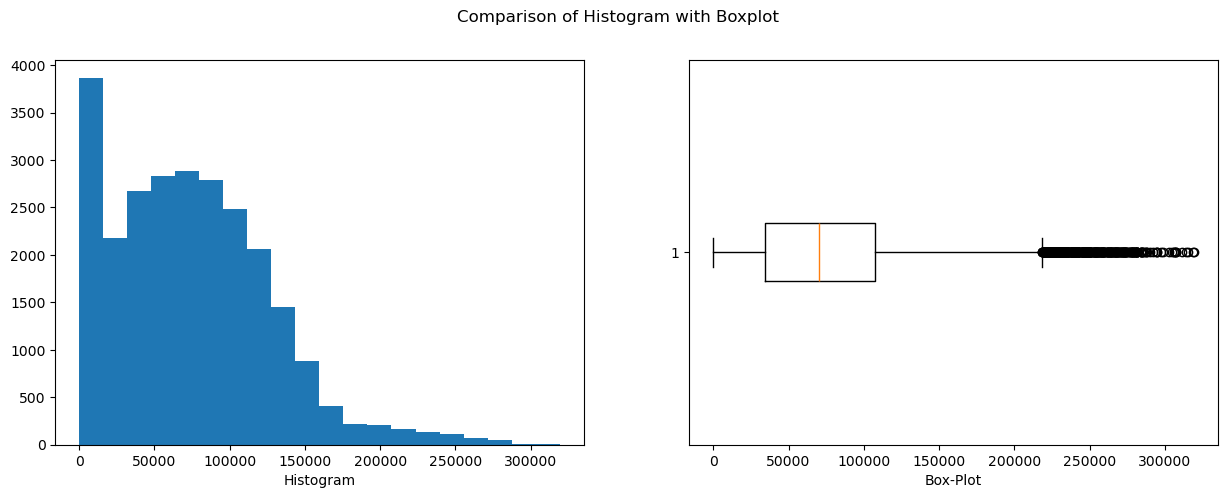

In [9]:
wage_plot=visa_df['prevailing_wage']

plt.figure(figsize=(15,5))

plt.suptitle('Comparison of Histogram with Boxplot')

plt.subplot(1,2,1).hist(wage_plot,bins=20)
plt.xlabel('Histogram')

plt.subplot(1,2,2).boxplot(wage_plot,vert=False)
plt.xlabel('Box-Plot')

plt.show()

**Finding the Outliers**

- We already know that outliers available less than **Q1 - 1.5 X IQR** and **Q3 + 1.5 X IQR**

- **STEP - 1:**

    - Calculate Q1 = 25p

    - Calculate Q2 = 50p

    - Calculate Q3 = 75p

- **STEP - 2:**

    - Calculate IQR = Q3 - Q1

- **STEP - 3:**

    - Calculate LB = Q1 - 1.5 X IQR

    - Calculate UB = Q3 + 1.5 X IQR

- **STEP - 4:**

    - Con1 = wage_data < LB

    - Con2 = wage_data > UB

    - Con3 = Con1 or/and Con2  (use bitwise operator)

- **STEP - 5:**

    - Data[Con3]

**OUTLIERS**

**SERIES TYPE**

In [6]:
wage_data = visa_df['prevailing_wage']

Q1=np.percentile(wage_data,25)
Q2=np.percentile(wage_data,50)
Q3=np.percentile(wage_data,75)


IQR = Q3 - Q1

LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

con1 = wage_data < LB
con2 = wage_data > UB

con3 = con1|con2

outliers_data = wage_data[con3]
outliers_data

14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

**DATAFRAME TYPE**

In [7]:
Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)


IQR = Q3 - Q1

LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

con1 = visa_df['prevailing_wage'] < LB
con2 = visa_df['prevailing_wage'] > UB

con3 = con1 | con2

outliers_data_df=visa_df[con3]
outliers_data_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


**NON_OUTLIERS**

**SERIES TYPE**

In [15]:
wage_data = visa_df['prevailing_wage']

Q1=np.percentile(wage_data,25)
Q2=np.percentile(wage_data,50)
Q3=np.percentile(wage_data,75)


IQR = Q3 - Q1

LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

con1 = wage_data > LB
con2 = wage_data < UB

con3 = con1 & con2

non_outliers_data = wage_data[con3]
non_outliers_data

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25474     51104.7800
25475     77092.5700
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25053, dtype: float64

**DATAFRAME TYPE**

In [9]:
Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)


IQR = Q3 - Q1

LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

con1 = visa_df['prevailing_wage'] > LB
con2 = visa_df['prevailing_wage'] < UB

con3 = con1 & con2

non_outliers_data_df=visa_df[con3]
non_outliers_data_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


- We have two dataframe

- visa_df : Total data - 25480

- non_outliers_df : After removing outliers - 25053

**NON_OUTLIERS --> HIST -  BOXPLOT**

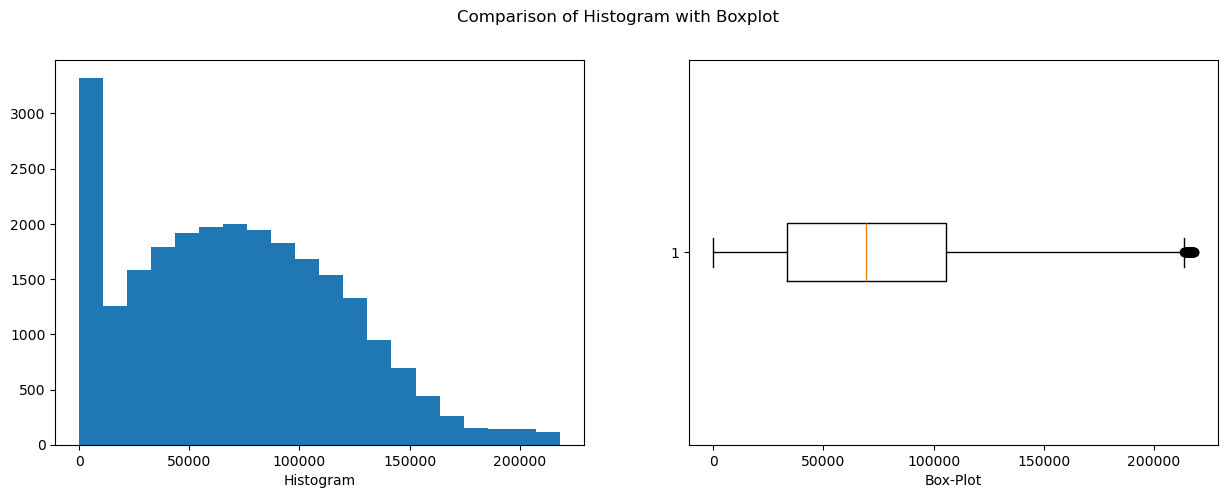

In [14]:
wage_plot_non_outliers=non_outliers_data_df['prevailing_wage']

plt.figure(figsize=(15,5))

plt.suptitle('Comparison of Histogram with Boxplot')

plt.subplot(1,2,1).hist(wage_plot_non_outliers,bins=20)
plt.xlabel('Histogram')

plt.subplot(1,2,2).boxplot(wage_plot_non_outliers,vert=False)
plt.xlabel('Box-Plot')

plt.show()

**NON-OUTLIERS and VISA_DF['prevailing_wage'] --> hist - boxplt**

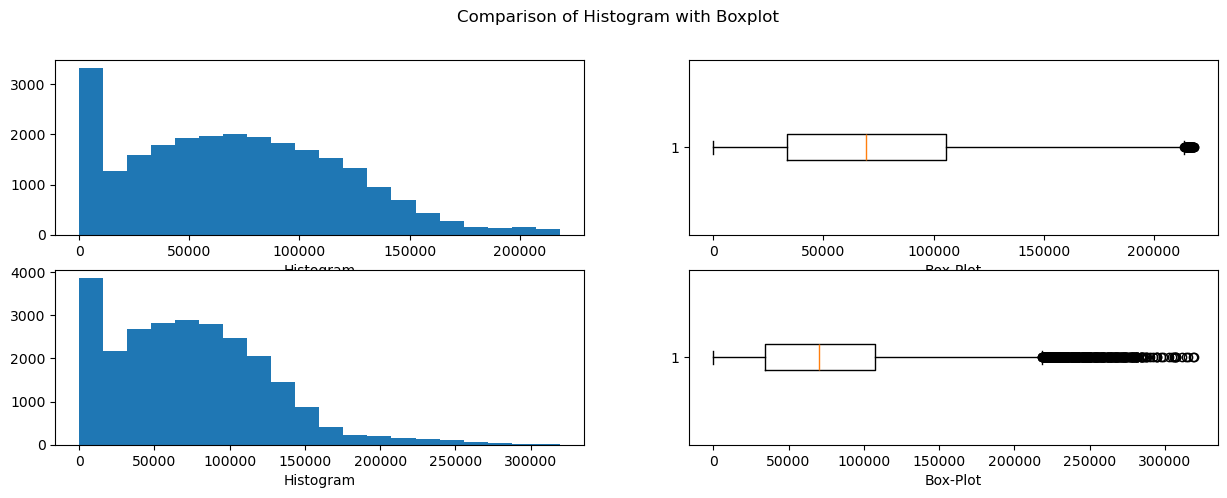

In [15]:
wage_plot_non_outliers=non_outliers_data_df['prevailing_wage']

plt.figure(figsize=(15,5))

plt.suptitle('Comparison of Histogram with Boxplot')

plt.subplot(2,2,1).hist(wage_plot_non_outliers,bins=20)
plt.xlabel('Histogram')

plt.subplot(2,2,2).boxplot(wage_plot_non_outliers,vert=False)
plt.xlabel('Box-Plot')

wage_plot=visa_df['prevailing_wage']

plt.subplot(2,2,3).hist(wage_plot,bins=20)
plt.xlabel('Histogram')

plt.subplot(2,2,4).boxplot(wage_plot,vert=False)
plt.xlabel('Box-Plot')

plt.show()

In [16]:
# Fill the outliers of wage data with wage median

# 427 outliers

# 427 should replace with median values

# again draw the plots

In [17]:
median_wage=visa_df['prevailing_wage'].median()
median_wage

70308.20999999999

In [19]:
outliers_data

14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

In [18]:
outliers_data.median()

243111.61

**Importing**

**Reading**

**Converting cat_num columns**

**Find outliers**

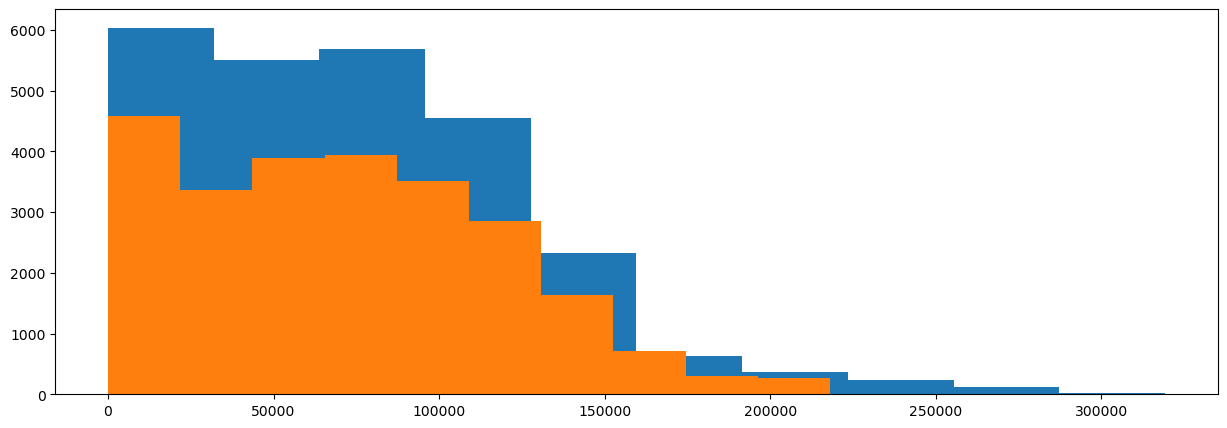

In [13]:
wage_plot_non_outliers=non_outliers_data_df['prevailing_wage']
wage_plot=visa_df['prevailing_wage']

plt.figure(figsize=(15,5))
plt.hist(wage_plot)
plt.hist(wage_plot_non_outliers)
plt.show()

**How to deal the outliers**

- 1. We can drop the outliers
 
     - Droping outliers is an easy task, but not recommended
    
     - If you drop the outliers we are droping the rows
    
     - which means we are droping the other column values also
    
     - Maybe some important information we might loose from other column values
    
     - But in industry if outliers percentage less than 2% of the total, we can drop
    
     - The number of outliers in p_wage is 427
    
     - The number of total observations are 25480
    
     - The percentage is 1.67 which is less than 2%
    
- 2. Fill with Median value
 
     - We already know that outliers does not affact by median
    
     - so it is the best practice to fill the outliers with median
    
- 3. Capping or Flooring
 
     - Instead of fill with median
    
     - We can fill with certain values
    
     - The outliers which are less than LB fill with LB value
    
     - The outliers which are greater than UB fill with UB value
    
- **ISOLATION FOREST**

    - Is ML model used to find the Outliers and Anamolies

**1. Drop The Outliers**

**2. Fill with Median Value**

**np.where**

- In numpy we have method called where

- It takes three arguments

    - 1. Condition

    - 2. Value if Condition is True

    - 3. Value if Condition is False

- It is applicable for only Binary means if and else

In [18]:
list1=[]
for value in wage_plot:
    if value < LB or value > UB:
        median=wage_plot.median()
        list1.append(median)
    else:
        list1.append(value)

In [19]:
dict1={'Sub':['DS','DE','CS'],
      'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,Sub,marks
0,DS,100
1,DE,200
2,CS,300


In [ ]:
# Q : I ant to replace marks with 1, which are greater than 100

In [21]:
l1=[]
for i in df.marks:
    if i > 100:
        l1.append(1)
    else:
        l1.append(i)

df['marks']=l1
df

,Sub,marks
0,DS,100
1,DE,1
2,CS,1


In [22]:
dict1={'Sub':['DS','DE','CS'],
      'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,Sub,marks
0,DS,100
1,DE,200
2,CS,300


In [24]:
con=df['marks']>100
l=np.where(con,1,df['marks'])
df['marks']=l
df

,Sub,marks
0,DS,100
1,DE,1
2,CS,1


In [ ]:
# Implement for the outliers

In [26]:
wage_data=visa_df['prevailing_wage']
con1=wage_data<LB
con2=wage_data>UB
con3 = con1 | con2
wage_median=wage_data.median()
l=np.where(con3,wage_median,wage_data)
l

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

In [28]:
visa_df['prevailing_wage_update']=l

(array([4580., 3368., 3890., 4369., 3507., 2860., 1643.,  706.,  295.,
         262.]),
 array([2.13670000e+00, 2.18113840e+04, 4.36206314e+04, 6.54298787e+04,
        8.72391260e+04, 1.09048373e+05, 1.30857621e+05, 1.52666868e+05,
        1.74476115e+05, 1.96285363e+05, 2.18094610e+05]),
 <BarContainer object of 10 artists>)

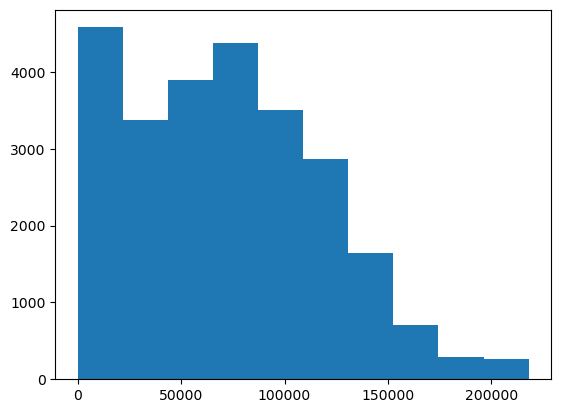

In [29]:
plt.hist(visa_df['prevailing_wage_update'])

(array([4580., 3368., 3890., 4369., 3507., 2860., 1643.,  706.,  295.,
         262.]),
 array([2.13670000e+00, 2.18113840e+04, 4.36206314e+04, 6.54298787e+04,
        8.72391260e+04, 1.09048373e+05, 1.30857621e+05, 1.52666868e+05,
        1.74476115e+05, 1.96285363e+05, 2.18094610e+05]),
 <BarContainer object of 10 artists>)

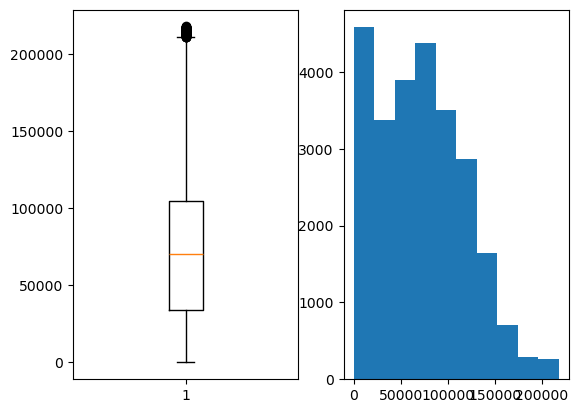

In [30]:
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage_update'])
plt.subplot(1,2,2).hist(visa_df['prevailing_wage_update'])

# S_6

**Importing**

**Reading**

**Converting cat_num columns**

**BI Variate Analysis**

- We already seen UNI variate analysis

- We performed the categorical columns analysis

    - Frequency table(Value counts)
 
    - Bar chart
 
    - Relative frequency table(Value counts Normalized form)
 
    - Pie chart

- We performed the numerical column analysis

    - Histogram

    - Distribution plots

    - Box plot

    - Outliers analysis
 
    - Filling the outliers
 
- Now we will do Categorical-Categorical Analysis

- Numerical - Numerical analysis

- Categorical - Numerical analysis

**Categorical - Categorical**

- Lets consider two columns

    - Continent

    - Case status

In [4]:
# continent
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [5]:
# case_status
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

**Task**

- Find the Certified observations continent wise

- Find the denied observations continent wise

In [6]:
con1 = visa_df['continent'] == 'Asia'
con2 = visa_df['case_status'] == 'Certified'
con3 = con1 & con2
visa_df[con3]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Year,Y,Certified
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.19,Year,Y,Certified
10,EZYV11,Asia,Master's,N,N,2465,2004,Midwest,83588.56,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified


In [7]:
len(visa_df[con3])

11012

In [18]:
continents=visa_df['continent'].unique()
certified_list, denied_list = [],[]
for i in continents:
    con1 = visa_df['continent']==i
    con2 = visa_df['case_status']=='Certified'
    con3 = visa_df['case_status']=='Denied'

    cert_con = con1 & con2
    den_con = con1 & con3

    cert_count = len(visa_df[cert_con])
    den_count = len(visa_df[den_con])

    print(f'The number of certified visa from {i} is : {cert_count}')
    print(f'The number of denied visa from {i} is : {den_count}')

    certified_list.append(cert_count)
    denied_list.append(den_count)

The number of certified visa from Asia is : 11012
The number of denied visa from Asia is : 5849
The number of certified visa from Africa is : 397
The number of denied visa from Africa is : 154
The number of certified visa from North America is : 2037
The number of denied visa from North America is : 1255
The number of certified visa from Europe is : 2957
The number of denied visa from Europe is : 775
The number of certified visa from South America is : 493
The number of denied visa from South America is : 359
The number of certified visa from Oceania is : 122
The number of denied visa from Oceania is : 70


In [19]:
# DATAFRAME

continents
certified_list

[11012, 397, 2037, 2957, 493, 122]

In [20]:
pd.DataFrame(zip(continents,certified_list))

,0,1
0,Asia,11012
1,Africa,397
2,North America,2037
3,Europe,2957
4,South America,493
5,Oceania,122


In [22]:
continents
certified_list
cols=['Continents','Certified']
df1=pd.DataFrame(zip(continents,certified_list),
                columns=cols)
df1

,Continents,Certified
0,Asia,11012
1,Africa,397
2,North America,2037
3,Europe,2957
4,South America,493
5,Oceania,122


In [24]:
continents
denied_list
cols=['Continents','Denied']
df2=pd.DataFrame(zip(continents,denied_list),
                columns=cols)
df2

,Continents,Denied
0,Asia,5849
1,Africa,154
2,North America,1255
3,Europe,775
4,South America,359
5,Oceania,70


In [25]:
continents
certified_list
denied_list
cols=['Certified','Denied']
df3=pd.DataFrame(zip(certified_list,denied_list),
                 index=continents,
                columns=cols)
df3

,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


**Cross Tab**

- The above data frame we can make by using a method : **Cross Tab**

- It is available in pandas

- It takes two arguments

    - Index

    - Column

- In above data frame index column is : **continent**

- Similarly, in above data frame data coumn is : **case_status**

In [26]:
pd.crosstab(visa_df['continent'],visa_df['case_status'])

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


In [27]:
idx_column=visa_df['continent']
data_column=visa_df['case_status']
df4=pd.crosstab(idx_column,data_column)
df4

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

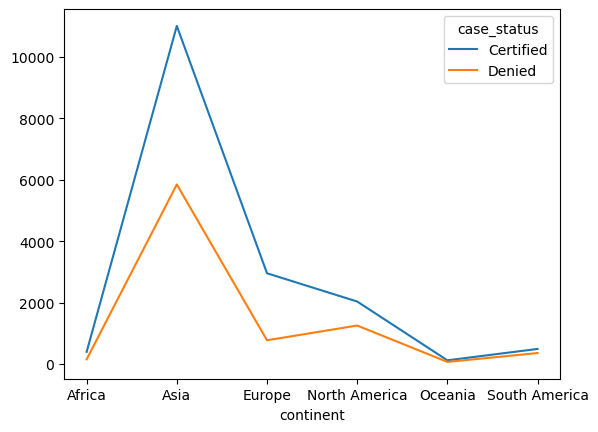

In [28]:
df4.plot()

<Axes: xlabel='continent'>

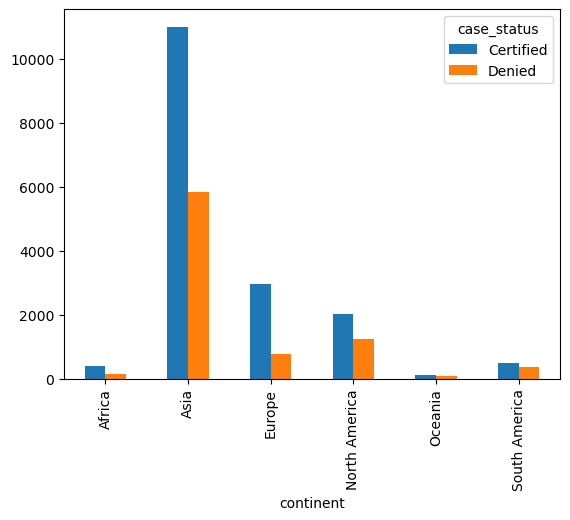

In [29]:
df4.plot(kind='bar')

<Axes: >

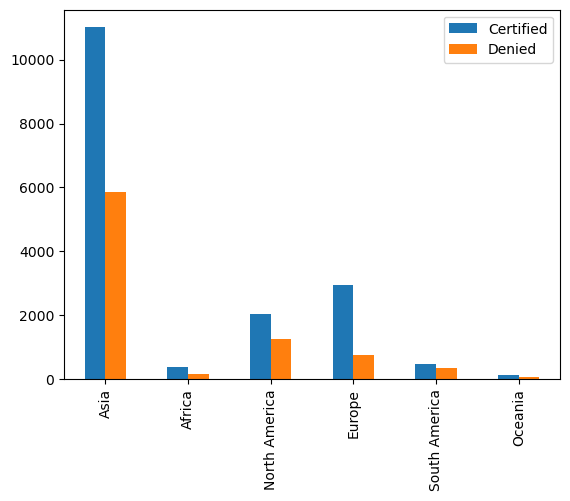

In [30]:
df3.plot(kind='bar')

**Multivariate analysis**

- Education

- Continent

- case_status

- We already know from Asia there 11k accepted visa

- In that I want furthur break down based on education

- here also **pd.crosstab**

    - first fix your index of any one column out of three columns

    - then keep 2 cols in a list and pass as data column

In [39]:
idx_column=visa_df['continent']
data_column=[visa_df['education_of_employee'],visa_df['case_status']]
df5=pd.crosstab(idx_column,data_column)
df5

education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

<Axes: xlabel='continent'>

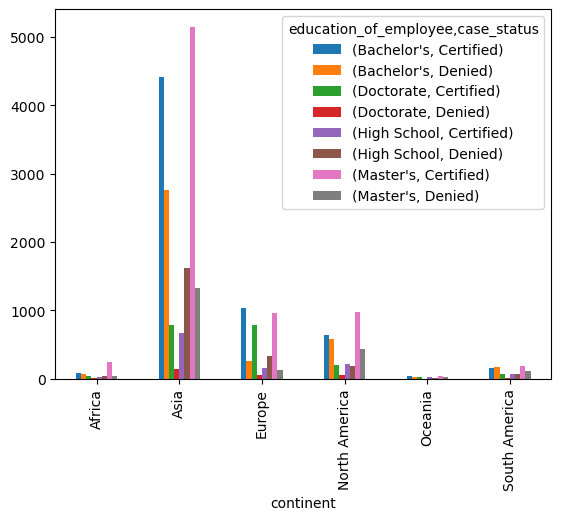

In [40]:
df5.plot(kind='bar')

In [37]:
idx_column=visa_df['education_of_employee']
data_column=[visa_df['continent'],visa_df['case_status']]
df6=pd.crosstab(idx_column,data_column)
df6

continent                Africa             Asia           Europe         \
case_status           Certified Denied Certified Denied Certified Denied   
education_of_employee                                                      
Bachelor's                   81     62      4407   2761      1040    259   
Doctorate                    43     11       780    143       788     58   
High School                  23     43       676   1614       162    328   
Master's                    250     38      5149   1331       967    130   

continent             North America          Oceania        South America  \
case_status               Certified Denied Certified Denied     Certified   
education_of_employee                                                       
Bachelor's                      641    584        38     28           160   
Doctorate                       207     51        19      3            75   
High School                     210    191        19     17            74   
Master's                        979    429        46     22           184   

continent                     
case_status           Denied  
education_of_employee         
Bachelor's               173  
Doctorate                 14  
High School               63  
Master's                 109

<Axes: xlabel='education_of_employee'>

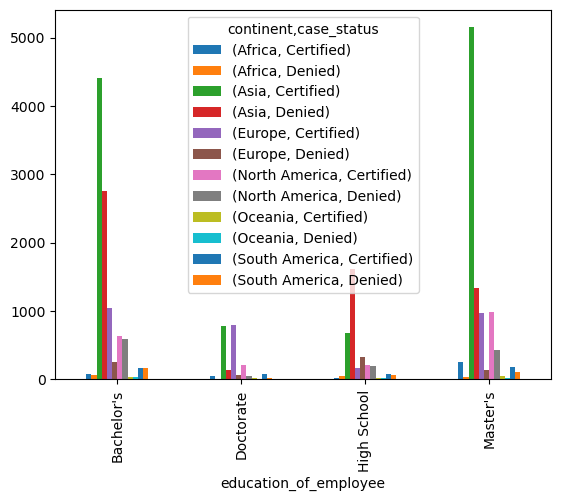

In [41]:
df6.plot(kind='bar')

In [ ]:
df6.plot(kind='bar');
#it removes show data

**Importing**

**Reading**

**Converting cat_num columns**

**Numerical vs Numerical**

- To understand numerical columns relation we need to plot scatter plots

- Scatter plots gives the relation between two numerical columns

- Bar chart - Pie chart - Histogram and Scatter plots

- Scatter plots under matplotlib package

- **plt.scatter**

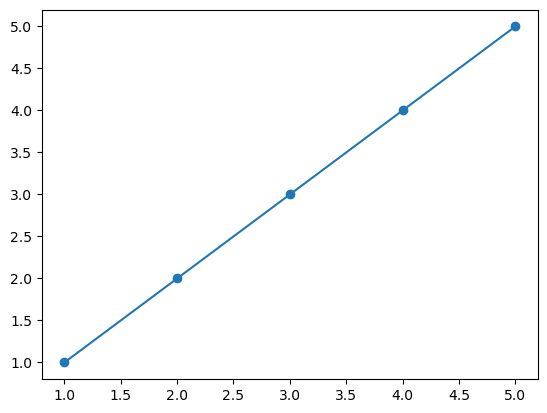

In [4]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]

plt.scatter(x,y)
plt.plot(x,y)
plt.show()

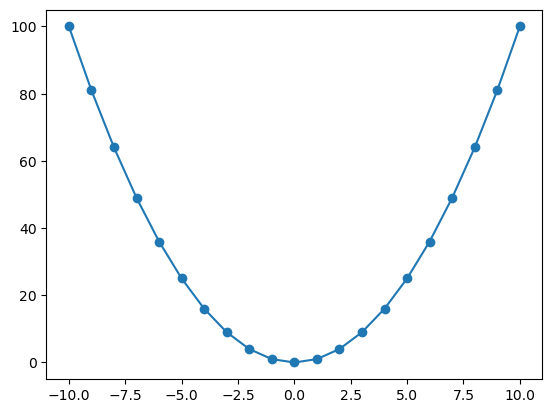

In [5]:
x=[i for i in range(-10,11)]
y=[i*i for i in x]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

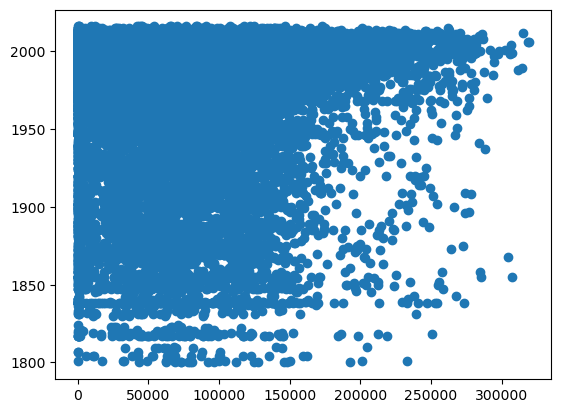

In [6]:
column_1 = visa_df['prevailing_wage']
column_2 = visa_df['yr_of_estab']
plt.scatter(column_1,column_2)

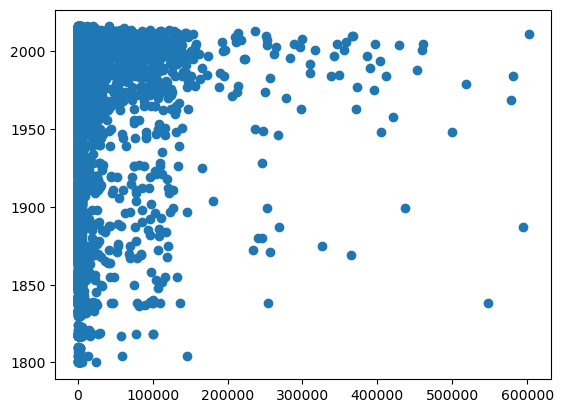

In [7]:
column_1 = visa_df['no_of_employees']
column_2 = visa_df['yr_of_estab']
plt.scatter(column_1,column_2)

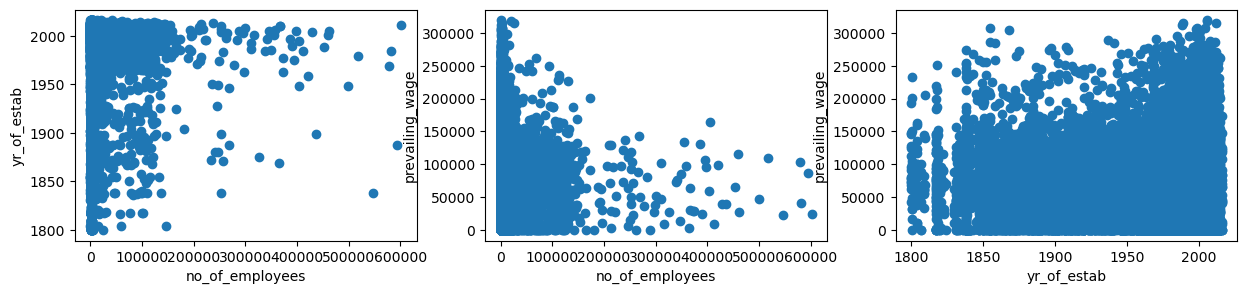

In [14]:
column_1 = visa_df['no_of_employees']
column_2 = visa_df['yr_of_estab']
column_3 = visa_df['prevailing_wage']

plt.figure(figsize=(15,3))

plt.subplot(1,3,1)
plt.xlabel('no_of_employees')
plt.ylabel('yr_of_estab')
plt.scatter(column_1,column_2)

plt.subplot(1,3,2)
plt.xlabel('no_of_employees')
plt.ylabel('prevailing_wage')
plt.scatter(column_1,column_3)

plt.subplot(1,3,3)
plt.xlabel('yr_of_estab')
plt.ylabel('prevailing_wage')
plt.scatter(column_2,column_3)

- Implement the Covariance function

- **Covariance vs Correlation**

    - **Covariance** will tell about the columns have relation or not

    - Covariance will explain about relation status

        - Positive relation

        - Negative relation

        - No relation

    - **Correlation** tells about how much relation b/w two variables

        - It denotes with **'r'**

        - r varies from **-1 to 1**

        - **-1 to 0** indicates -ve relation

        - **0 to 1** indicates +ve relation

        - **0** indicates no relation

**method name : corr**

In [8]:
visa_df.corr()

ValueError: could not convert string to float: 'EZYV01'

In [15]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


**Heat Map**

- Heat map is one of the important visualization method, to show the Matrix form of values

- It is under **seaborn** packages

- In every matrix we have heighest values and lowest values available

- Heat map will give colour visualization

- Also it provides color bar, which color indicates which value

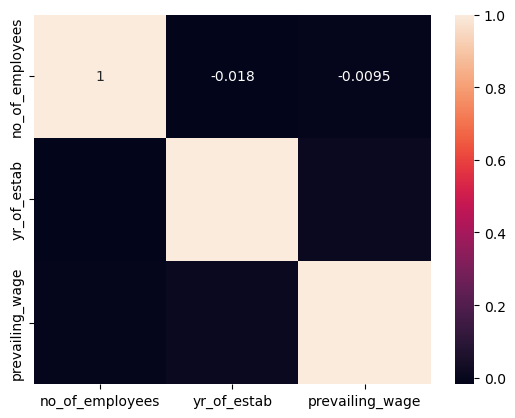

In [18]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True)
plt.show()

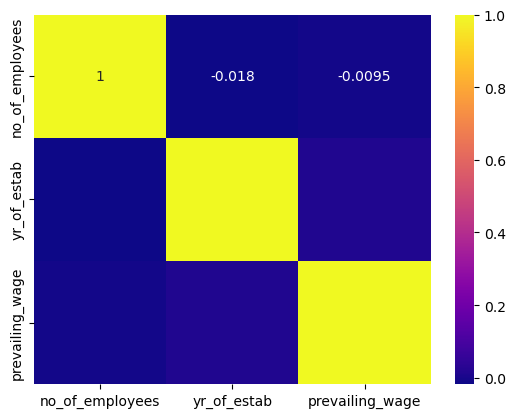

In [11]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True,cmap='plasma')
plt.show()

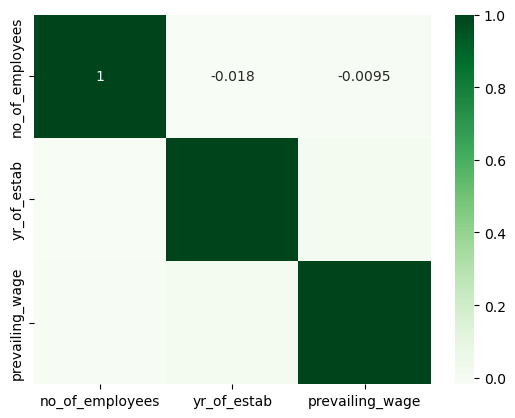

In [13]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True,cmap='Greens')
plt.show()

In [ ]:
# Viridis - Hot - Coolwarm - Gray - Jet - Bone - Autumn

- By seeing the Graphs we might not say the relation status

- It is best practice get the percentage of relation using Correlation

- All 3 columns having approximateely zero percentage of relation

- Which indicates all the columns having no relation 

- No relation means independent each other

- In ML we expect the input columns should be independent each other

- Corr method gives matrix view

- We have 3 columns means 3*3 total 9 fields

- if a data has 20 columns then 20*20 total 400 fields

- thats why always go with heatmap visualization